In [42]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from control.matlab import *


Running Python: 3.8.17
Running Sympy: 1.12rc1


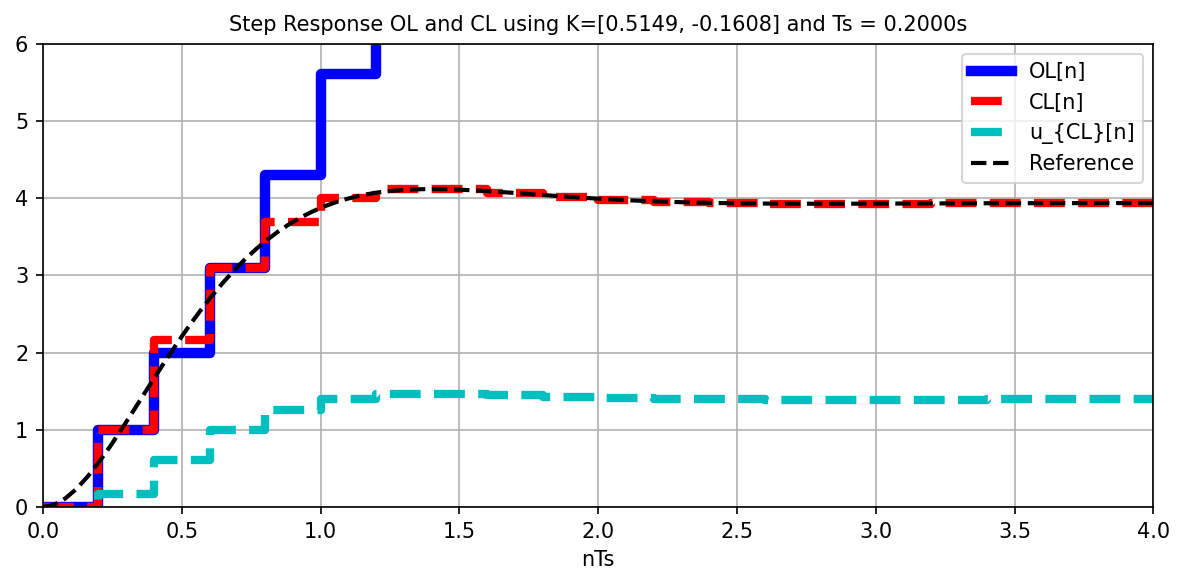

In [130]:
Ts = 0.2
Tmax = 4
A = np.array([[0, 1],[.1, 1]])
B = np.array([0,1]).reshape(2,1)
C = np.array([1,0])
D = np.array([0])
G = ss(A,B,C,D,Ts)

zeta_targ = 0.7
wn_targ = np.pi
s_target = complex(-zeta_targ*wn_targ,wn_targ*np.sqrt(1-zeta_targ**2))
z_target = np.exp(s_target*Ts)
char_eq_targ = np.convolve([1, -z_target],[1, -np.conjugate(z_target)])
k1 = char_eq_targ[2].real + A[1,0]
k2 = char_eq_targ[1].real + A[1,1]
K = [k1, k2]

Gcl = ss(G.A - G.B*K,G.B,G.C,G.D,Ts)
y,t = step(G,Tmax)
ycl,tcl,xout = step(Gcl,Tmax,return_x = True)
ucl = np.sum(K*xout,1)

[uu,vv] = step(tf(ycl[-1]*wn_targ**2,[1, 2*zeta_targ*wn_targ, wn_targ**2]),Tmax)

fig = plt.subplots(1, figsize=(8,4), dpi=150)
plt.step(t,y,'b-',lw=5,label='OL[n]')
plt.step(tcl,ycl,'r--',lw=4,label='CL[n]')
plt.step(tcl,ucl,'c--',lw=4,label='u_{CL}[n]')
plt.plot(vv,uu,'k--',lw=2,label='Reference')
plt.xlim([0, Tmax])
plt.xlabel("nTs")
plt.ylim([0, np.ceil(1.5*ycl[-1])])
plt.legend()
plt.title("Step Response OL and CL using K=[{:3.4f}, {:3.4f}] and Ts = {:3.4f}s".format(K[0],K[1],Ts))
plt.show()